In [1]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[["calories", "sodium", "alcohol", "cost"]]
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


In [3]:
from sklearn.cluster import KMeans
km2 = KMeans(n_clusters=2).fit(X)
km3 = KMeans(n_clusters=3).fit(X)
beer['cluster2'] = km2.labels_
beer['cluster3'] = km3.labels_
beer.sort_values('cluster2')

,name,calories,sodium,alcohol,cost,cluster2,cluster3
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


In [4]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [5]:
beer.groupby("cluster3").mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,150.00,17.0,4.521429,0.520714,0.0
1,102.75,10.0,4.075000,0.440000,1.0
2,70.00,10.5,2.600000,0.420000,1.0


Text(0.5, 0.92, 'With 3 centroids initialized')

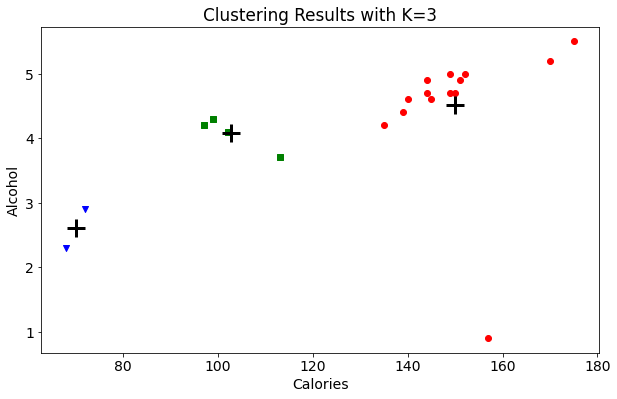

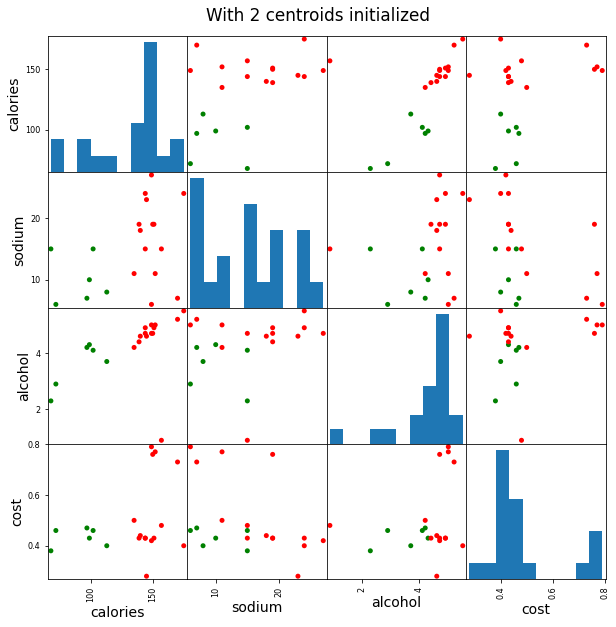

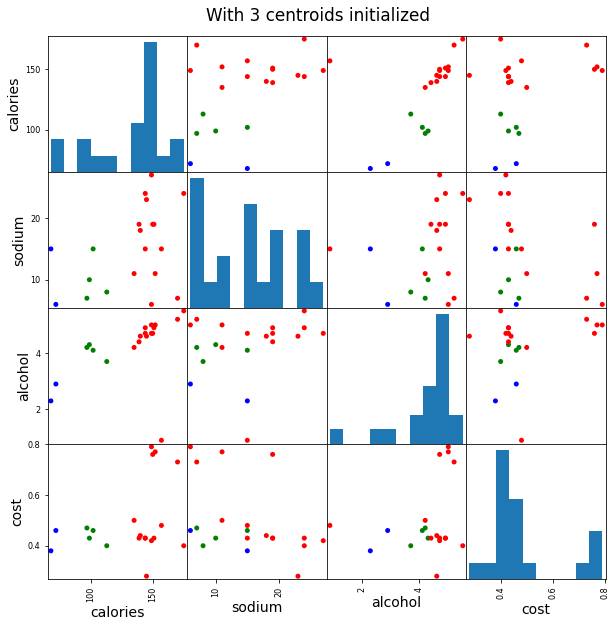

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

#plotting clustering results with K=3 axies by Caloires*Alcohol
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
centers = beer.groupby('cluster3').mean().reset_index()
colors = np.array(['red', 'green', 'blue', 'yellow'])
markers = np.array(['o', ',', 'v','^'])
for x,y,cr,mr in zip(beer["calories"],beer["alcohol"],colors[beer["cluster3"]],markers[beer["cluster3"]]):
    plt.scatter(x, y, c=cr, marker=mr)
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel("Calories")
plt.ylabel("Alcohol")
plt.title("Clustering Results with K=3")

#scatter matrix with K=2
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized",x=0.5,y=0.92)

#scatter matrix with K=3
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster3"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized",x=0.5,y=0.92)